<a href="https://colab.research.google.com/github/kevin6449/speech_sample_code/blob/main/Q_Style_Character_Packaging_Design_Vertex_ai_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install the Vertex AI SDK: Open a terminal window and enter the command below. You can also [install it in a virtualenv](https://googleapis.dev/python/aiplatform/latest/index.html)

In [ ]:
!pip install --upgrade --user google-cloud-aiplatform

  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.7 MB/s eta 0:00:00
Using cached anyio-4.9.0-py3-none-any.whl (100 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires anyio<4,>=3.1.0, but you have anyio 4.9.0 which is incompatible.


2. To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel. The restart might take a minute or longer. After it is restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

3. Set up the helper function to display image.

In [ ]:
import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

4. Use the following code in your application to request a model response.

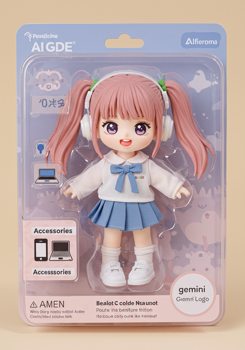

In [ ]:
from vertexai.preview.vision_models import ImageGenerationModel
import vertexai

## PROJECT_ID
PROJECT_ID = "" # @param {type: "string", placeholder: "PROJECT_ID", isTemplate: true}

## us-central1
REGION = "us-central1"  #  @param {type: "string", placeholder: "REGION", isTemplate: true}

vertexai.init(project=PROJECT_ID, location=REGION)

generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-002")

images = generation_model.generate_images(
    prompt="Please present my photo in a \\\"cute cartoon style\\\", create a Q-version doll packaging design with bright colors and real-life contours, and design a doll packaging that matches the character's style. The packaging should be a hanging card-style plastic display box, the box color should match the character's clothes color, the overall style should be \\\"google color\\\", and the words \\\"AI GDE\\\" should be printed on the top of the box. There is an area called \\\"Accessories\\\" on the left side of the package, which contains 3 accessories: laptop/mobile phone/Gemini Logo. Finally, make the whole picture look like the front figure product on the shelf.",
    number_of_images=4,
    aspect_ratio="3:4",
    negative_prompt="",
    person_generation="",
    safety_filter_level="",
    add_watermark=True,
)

display_image(images[0])

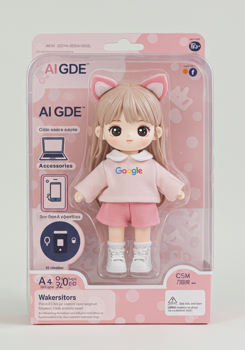

In [ ]:
display_image(images[1])

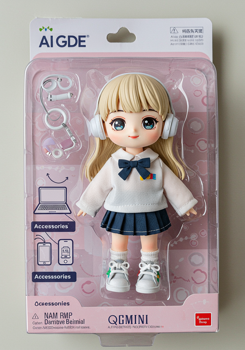

In [ ]:
display_image(images[2])

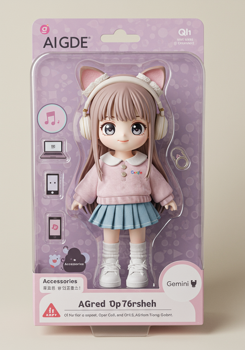

In [ ]:
display_image(images[3])